In [1]:
import sys; sys.path.append('../../..')
import numpy as np, elastic_rods, importlib
from bending_validation import suppress_stdout
from linkage_vis import LinkageViewer
from matplotlib import pyplot as plt

l = elastic_rods.RodLinkage('../../../../examples/florin/20181227_193550_meshID_5ca2f7ab-3602-4ede-ac4d-c2bd798b2961.obj', 8)
#driver=166
driver=l.centralJoint()

#mat = elastic_rods.RodMaterial('+', 2000, 0.3, [5, 5, 0.7, 0.7], stiffAxis=elastic_rods.StiffAxis.D1)
mat = elastic_rods.RodMaterial('rectangle', 20000, 0.3, [10, 7])
l.setMaterial(mat)

with suppress_stdout(): elastic_rods.restlen_solve(l)
jdo = l.dofOffsetForJoint(driver)
fixedVars = list(range(jdo, jdo + 6)) # fix rigid motion for a single joint
# fixedVars.append(jdo + 6) # constrain angle at the driving joint
with suppress_stdout(): elastic_rods.compute_equilibrium(l, fixedVars=fixedVars)

view = LinkageViewer(l, width=1800, height=1024, labelOffset=-0.5)
view.setCameraParams(((1.8659142934419153, -1.5124515064889312, 0.7807103557642141),
 (-0.05341198874549071, -0.06751049610602136, 0.9962878561810181),
 (0.01118093987834964, 0.840952861840846, -0.4255224248686851)))
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.7578125, children=(DirectionalLight(color='white', intensity=0.6, p…

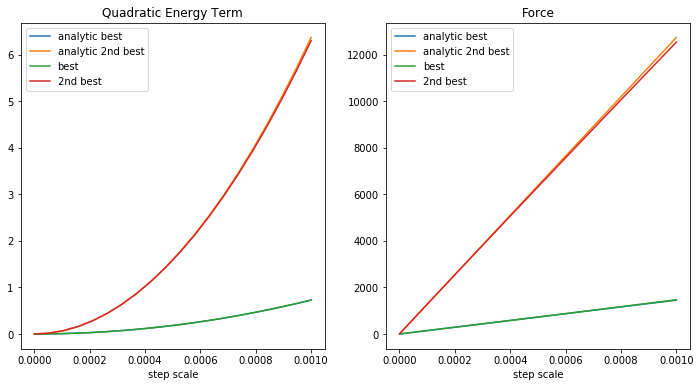

In [2]:
import deployment_path_analysis
importlib.reload(deployment_path_analysis)
dpa = deployment_path_analysis.deploymentPathAnalysis(l)
deployment_path_analysis.validateEnergyIncrements(l, epsMax=1e-2)

In [9]:
openingAngles, stiffnessGaps = deployment_path_analysis.stiffnessGapThroughoutDeployment(l, np.deg2rad(93), 100)
view.update()

In [7]:
stiffnessGaps[-1]

0.3005544219930929

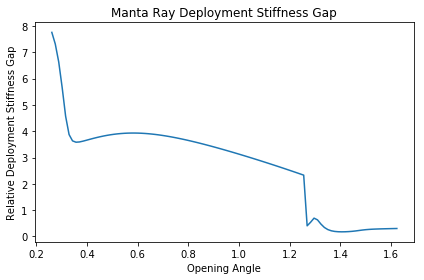

In [6]:
plt.plot(openingAngles, stiffnessGaps)
plt.ylabel('Relative Deployment Stiffness Gap')
plt.xlabel('Opening Angle')
plt.title('Manta Ray Deployment Stiffness Gap')
plt.tight_layout()
plt.savefig('stiffness_gap_manta_ray.pdf')
plt.show()

In [2]:
from open_linkage import open_linkage
def equilibriumSolver(tgtAngle, l, opts, fv):
    opts.beta = 1e-8
    opts.gradTol = 1e-4
    opts.useIdentityMetric = False
    return elastic_rods.compute_equilibrium(l, tgtAngle, options=opts, fixedVars=fv)
# open_linkage(l, driver, 2 * np.pi/3, 25, view, zPerturbationEpsilon=0, equilibriumSolver=equilibriumSolver, maxNewtonIterationsIntermediate=20, verbose=10, useTargetAngleConstraint=False);
with suppress_stdout(): open_linkage(l, driver, np.deg2rad(93) - l.averageJointAngle, 10, view, zPerturbationEpsilon=0, equilibriumSolver=equilibriumSolver, maxNewtonIterationsIntermediate=20, verbose=10, useTargetAngleConstraint=True);
#with suppress_stdout(): open_linkage(l, driver, np.deg2rad(40) - l.averageJointAngle, 10, view, zPerturbationEpsilon=0, equilibriumSolver=equilibriumSolver, maxNewtonIterationsIntermediate=20, verbose=10, useTargetAngleConstraint=True);

In [ ]:
with suppress_stdout(): open_linkage(l, driver, np.deg2rad(80) - l.averageJointAngle, 10, None, zPerturbationEpsilon=0, equilibriumSolver=equilibriumSolver, maxNewtonIterationsIntermediate=20, verbose=10, useTargetAngleConstraint=True)
view.update()

In [10]:
m = deployment_path_analysis.deploymentModeViewer(l)

In [11]:
m.setAmplitude(0.1)

In [12]:
m.show()

In [5]:
import compute_vibrational_modes
fixedVarsWithoutActuator = fixedVars[:]
# lambdas, modes = compute_vibrational_modes.compute_vibrational_modes(l, fixedVars=fixedVarsWithoutActuator, mtype=compute_vibrational_modes.MassMatrixType.FULL)
lambdas, modes = compute_vibrational_modes.compute_vibrational_modes(l, fixedVars=[], mtype=compute_vibrational_modes.MassMatrixType.FULL, n=16, sigma=-1e-6)

import mode_viewer, importlib
importlib.reload(mode_viewer);
mview = mode_viewer.ModeViewer(l, modes, lambdas, amplitude=5.0)
mview.show()

In [ ]:
l.saveVisualizationGeometry('deployed_meshID_bdb78930-da3e-4a28-98f5-89c2ee17876c.obj')
#l.writeLinkageDebugData('')

In [ ]:
from linkage_utils import writeRodSegments
writeRodSegments(l,'rod_segments_meshID_1a219f3e-c853-4985-ad5f-f13b369c0e63.txt', zeroBasedIndexing=True)

In [ ]:
np.savetxt('restlen_meshID_1a219f3e-c853-4985-ad5f-f13b369c0e63.txt',l.getPerSegmentRestLength())

In [ ]:
np.rad2deg(l.averageJointAngle)